In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('global_unemployment_data.csv')

In [3]:
data

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Zimbabwe,Unemployment rate by sex and age,Female,25+,Adults,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528
1130,Zimbabwe,Unemployment rate by sex and age,Female,Under 15,Children,5.174,5.666,6.014,6.289,6.555,6.990,8.494,9.853,9.670,9.518,9.414
1131,Zimbabwe,Unemployment rate by sex and age,Male,15-24,Youth,6.007,7.131,8.119,9.029,9.927,11.048,13.191,14.261,13.966,13.675,13.485
1132,Zimbabwe,Unemployment rate by sex and age,Male,25+,Adults,3.677,4.325,4.843,5.287,5.722,6.362,6.996,7.234,6.858,6.757,6.703


### Data Cleaning

#### 1. Drop Unnecessary Rows
We will only be looking at unemployment rate for adults.

We know that the age group of adults appear in every 3 rows. Columns specifying age group will also be unnecessary.

In [4]:
adults_data = data.iloc[[i for i in range(len(data)) if i%3 in {1}]].drop(columns=['indicator_name','age_group','age_categories']).reset_index(drop=True)
adults_data

,country_name,sex,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Female,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
1,Afghanistan,Male,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
2,Albania,Female,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488
3,Albania,Male,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.882,9.476,9.324
4,Algeria,Female,11.913,12.301,14.918,17.576,17.879,18.138,20.163,19.887,18.914,18.625,18.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Yemen,Male,8.398,11.705,12.169,12.396,11.732,11.541,12.301,12.781,11.981,11.961,11.904
374,Zambia,Female,5.390,5.782,6.115,6.476,4.183,4.338,5.211,4.448,3.998,3.917,3.901
375,Zambia,Male,5.136,5.341,5.469,5.612,3.796,4.026,3.934,3.558,2.833,2.696,2.621
376,Zimbabwe,Female,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528


#### 2. Map Countries by Continents
Directly copying the countries and its continents required a lot of manual work on the notebook. Decided to practice webscrape.

The website we referenced is: https://wisevoter.com/country-rankings/countries-by-continent/

In [5]:
import requests
r = requests.get('https://wisevoter.com/country-rankings/countries-by-continent/')
r

<Response [200]>

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

In [7]:
soup.find('td')

<td class="shdb-on-page-table-body-Geo">Algeria</td>

In [8]:
countries_continents = soup.find_all('td')
continents_dict = {}
for i in range(0, len(countries_continents), 2):
    if countries_continents[i+1].text not in continents_dict:
        continents_dict[countries_continents[i+1].text] = [countries_continents[i].text]
    else:
        continents_dict[countries_continents[i+1].text].append(countries_continents[i].text)
continents_dict

{'Africa': ['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Democratic Republic of the Congo',
  'Djibouti',
  'Egypt',
  'Equatorial Guinea',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Ivory Coast',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Republic of the Congo',
  'Rwanda',
  'Saint Helena',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'Somaliland',
  'South Africa',
  'South Sudan',
  'Sudan',
  'São Tomé and Príncipe',
  'Tanzania',
  'The Gambia',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe',
  'Eswatini'],
 'Asia': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'East

In [9]:
adults_data.loc[adults_data['country_name']== 'Taiwan, China'].index

Index([328, 329], dtype='int64')

In [10]:
def preprocess_country_name(country):
    return ''.join(country.strip().split()).lower()

In [11]:
countries_to_categorize = adults_data['country_name'].copy()
categorized = []
for country in countries_to_categorize:
    country = preprocess_country_name(country)
    for continent, countries in continents_dict.items():
        preprocessed_countries = [preprocess_country_name(c) for c in countries]
        if country in preprocessed_countries: # country name is named differently in the website to the dataframe
            categorized.append(continent)
            break 
len(categorized)

322

Issue: country name is named differently in the website and dataset.

Approach 1: Use code to find what are not named the same.

Appraoch 2: Modify code to identify the same country but not named exactly the same.

In [12]:
# all countries need to be categorized from dataframe
data_countries = (pd.Series(countries_to_categorize.unique()
                            ).to_frame()
                            .reset_index())
data_countries

,index,0
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Angola
4,4,Argentina
...,...,...
184,184,"Venezuela, Bolivarian Republic of"
185,185,Viet Nam
186,186,Yemen
187,187,Zambia


In [13]:
# all countries scraped from website
website_countries = (pd.Series([country for list in continents_dict.values() for country in list])
                     .sort_values()
                     .reset_index(drop=True)
                     .to_frame()
                     .reset_index())
website_countries

,index,0
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Andorra
4,4,Angola
...,...,...
224,224,Western Sahara
225,225,Yemen
226,226,Zambia
227,227,Zimbabwe


In [14]:
# Countries found in dataframe but not in website
merged = data_countries.merge(website_countries, on = 0, how = 'outer')
merged[merged['index_y'].isnull()]

,index_x,0,index_y
9,9.0,Bahamas,NaN
22,22.0,Brunei Darussalam,NaN
26,26.0,Cabo Verde,NaN
32,32.0,Channel Islands,NaN
34,34.0,China,NaN
37,37.0,Congo,NaN
38,38.0,"Congo, Democratic Republic of the",NaN
43,43.0,Czechia,NaN
59,59.0,French Polynesia,NaN
61,61.0,Gambia,NaN


We want to modify the country name in the `continents_dict` so it matches the name of the country in the dataframe. We care about whether the country in the dataframe can be mapped to a corresponding continent. It is also easier to modify country name in the dataframe than accessing the values in the dictionary.

If we run into countries in the dataframe but not in the website, we can modify the `continents_dict` if other research can confirm the continent the country is part of.

In [27]:
# drop channel islands, cannot clarify what country that is
# drop South America, unsure if it is data for the whole continent or rest of the continent

country_name_mapping = {
    'Bahamas':'The Bahamas',
    'Brunei Darussalam':'Brunei',
    'Cabo Verde':'Cape Verde',
    'China': 'People\'s Republic of China',
    'Congo': 'Republic of the Congo',
    'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
    'Czechia': 'Czech Republic',
    'Gambia': 'The Gambia',
    'Hong Kong, China': 'Hong Kong',
    'Iran, Islamic Republic of': 'Iran',
    'Korea, Democratic People\'s Republic of': 'North Korea',
    'Korea, Republic of': 'South Korea',
    'Lao People\'s Democratic Republic': 'Laos',
    'Macau, China': 'Macau',
    'Moldova, Republic of': 'Moldova',
    'Palestinian Territories': 'Palestine',
    'Russian Federation': 'Russia',
    'Sao Tome and Principe': 'São Tomé and Príncipe',
    'Syrian Arab Republic': 'Syria',
    'Taiwan, China': 'Taiwan',
    'Tanzania, United Republic of': 'Tanzania',
    'Timor-Leste': 'East Timor',
    'United States': 'United States of America',
    'Venezuela, Bolivarian Republic of': 'Venezuela',
    'Viet Nam': 'Vietnam'
}

In [16]:
continents_dict['Oceania'].append('French Polynesia')

In [17]:
continents_dict['Europe'].append('North Macedonia')

In [20]:
def replace_country_name(country):
    return country_name_mapping.get(country, country)

adults_data['country_name'] = adults_data['country_name'].apply(replace_country_name)
adults_data

,country_name,sex,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Female,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
1,Afghanistan,Male,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
2,Albania,Female,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488
3,Albania,Male,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.882,9.476,9.324
4,Algeria,Female,11.913,12.301,14.918,17.576,17.879,18.138,20.163,19.887,18.914,18.625,18.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Yemen,Male,8.398,11.705,12.169,12.396,11.732,11.541,12.301,12.781,11.981,11.961,11.904
374,Zambia,Female,5.390,5.782,6.115,6.476,4.183,4.338,5.211,4.448,3.998,3.917,3.901
375,Zambia,Male,5.136,5.341,5.469,5.612,3.796,4.026,3.934,3.558,2.833,2.696,2.621
376,Zimbabwe,Female,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528


In [26]:
countries_to_categorize = adults_data['country_name'].copy()
categorized = []
for country in countries_to_categorize:
    for continent, countries in continents_dict.items():
        if country in countries:
            categorized.append(continent)
            break 
len(categorized)

374

After mofidying the country names in the dataframe to match the website, we have successfully found the corresponding continents.
Note that there are 374 instead of 378 is because we have decided to drop the rows for `Channel Islands` and `South America`, which makes 4 rows less than original.

In [28]:
adults_data = adults_data[~adults_data['country_name'].isin(["Channel Islands", "South America"])]
adults_data

,country_name,sex,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Female,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
1,Afghanistan,Male,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
2,Albania,Female,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488
3,Albania,Male,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.882,9.476,9.324
4,Algeria,Female,11.913,12.301,14.918,17.576,17.879,18.138,20.163,19.887,18.914,18.625,18.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Yemen,Male,8.398,11.705,12.169,12.396,11.732,11.541,12.301,12.781,11.981,11.961,11.904
374,Zambia,Female,5.390,5.782,6.115,6.476,4.183,4.338,5.211,4.448,3.998,3.917,3.901
375,Zambia,Male,5.136,5.341,5.469,5.612,3.796,4.026,3.934,3.558,2.833,2.696,2.621
376,Zimbabwe,Female,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528


In [30]:
adults_data.assign(continent = categorized)

,country_name,sex,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,continent
0,Afghanistan,Female,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298,Asia
1,Afghanistan,Male,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087,Asia
2,Albania,Female,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488,Europe
3,Albania,Male,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.882,9.476,9.324,Europe
4,Algeria,Female,11.913,12.301,14.918,17.576,17.879,18.138,20.163,19.887,18.914,18.625,18.400,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Yemen,Male,8.398,11.705,12.169,12.396,11.732,11.541,12.301,12.781,11.981,11.961,11.904,Asia
374,Zambia,Female,5.390,5.782,6.115,6.476,4.183,4.338,5.211,4.448,3.998,3.917,3.901,Africa
375,Zambia,Male,5.136,5.341,5.469,5.612,3.796,4.026,3.934,3.558,2.833,2.696,2.621,Africa
376,Zimbabwe,Female,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528,Africa


Write the data we want to work with into a new csv file.

In [31]:
adults_data.to_csv('global_unemployment_adult_data.csv')

#### 3. Find Missing Data

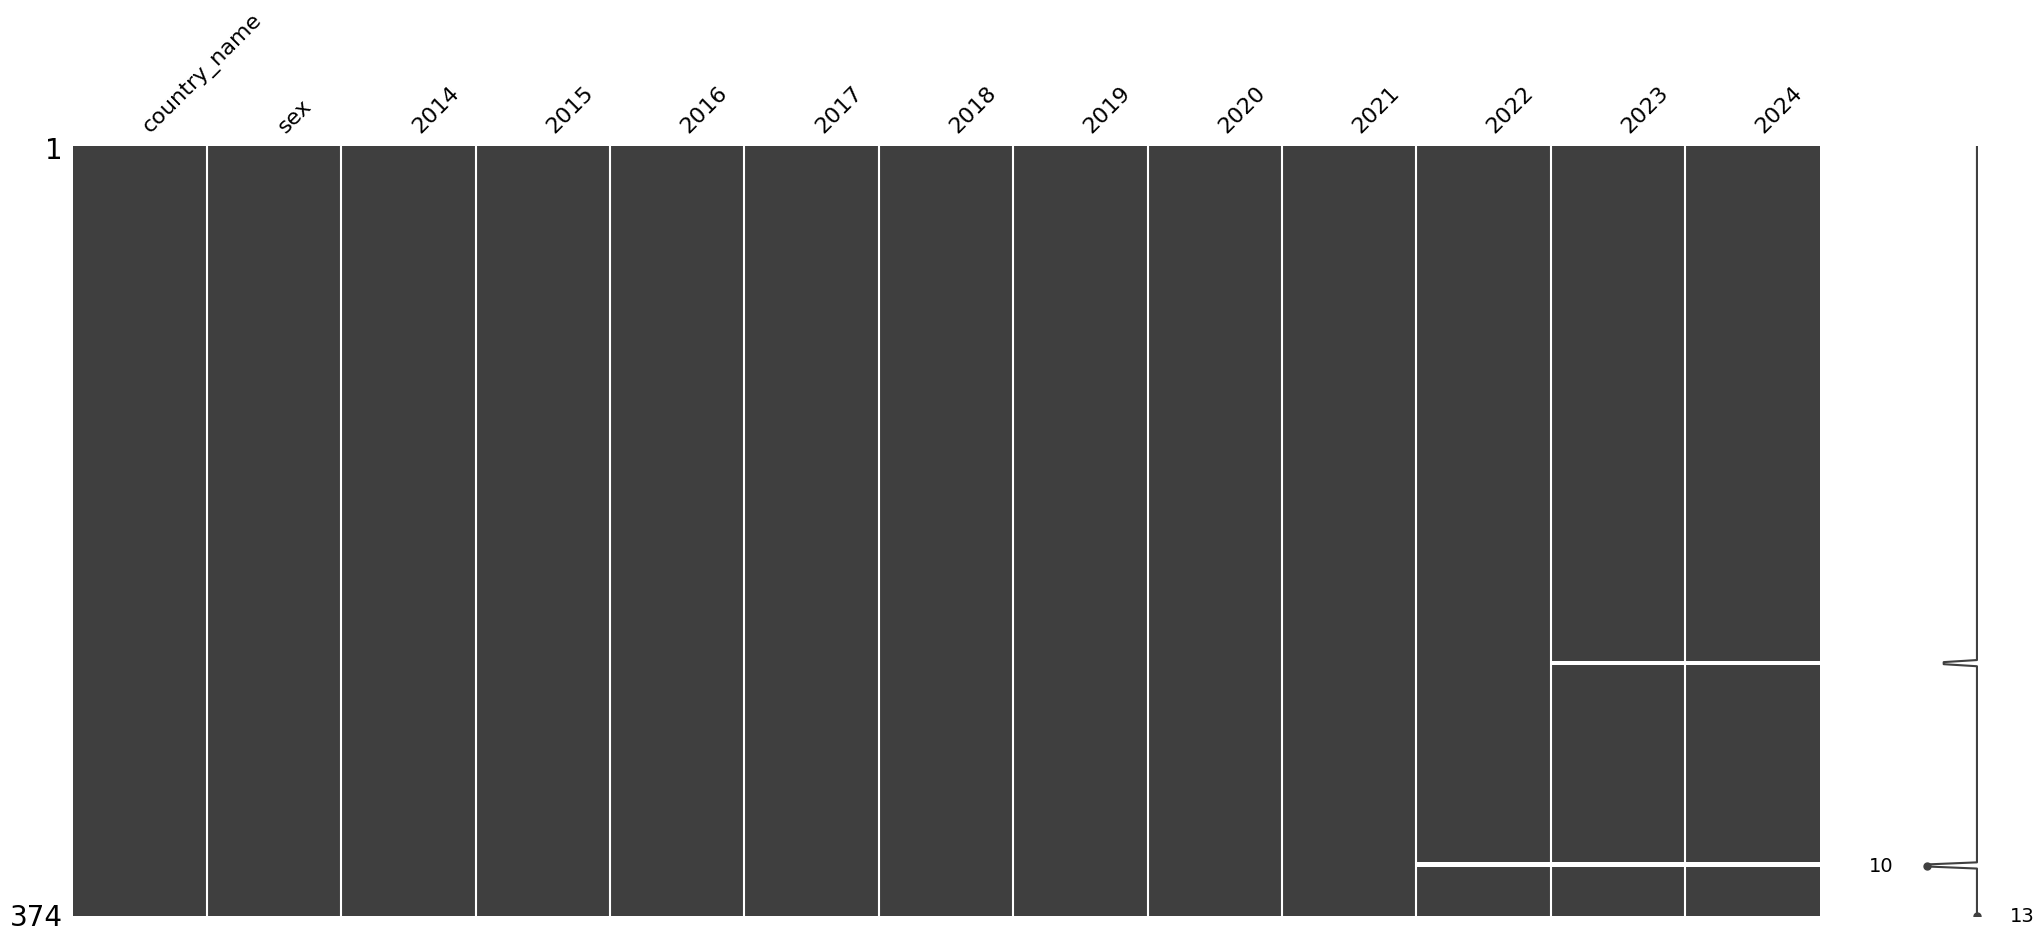

In [34]:
import missingno as msno
msno.matrix(adults_data);

In [35]:
adults_data[adults_data.isna().any(axis=1)]

,country_name,sex,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
252,Palestine,Female,20.681,28.478,31.496,35.803,35.161,35.022,33.515,37.921,36.385,NaN,NaN
253,Palestine,Male,14.085,15.385,15.868,16.334,17.476,17.043,18.443,17.955,16.772,NaN,NaN
352,Ukraine,Female,6.292,6.990,6.669,7.069,6.615,7.345,8.508,9.519,NaN,NaN,NaN
353,Ukraine,Male,9.524,8.843,9.617,10.301,9.442,7.882,9.073,8.933,NaN,NaN,NaN
